## **Student Performance Factors Analysis** by Kyle Ryan

## **Context:**  

In many instances, **school funding is tied to student performance benchmarks**, often the only way for a school or district to secure funding is by **improving student performance on standardized tests**.



## **Objective:**  

I will be exploring the dataset provided with the goal to determine which factors affect the student performance **(exam score)**, and come up with strategies to potentially increase these factors in the real world.


## **Data Dictionary:**

* **Hours_Studied**: Number of hours spent studying per week.
* **Attendance**: Percentage of classes attended.
* **Parental_Involvement**: Level of parental involvement in the student's education (Low, Medium, High).
* **Access_to_Resources**: Availability of educational resources (Low, Medium, High).
* **Extracurricular_Activities**: Participation in extracurricular activities (Yes, No).
* **Sleep_Hours**: Average number of hours of sleep per night.
* **Previous_Scores	Scores**: Scores from previous exams.
* **Motivation_Level**: Student's level of motivation (Low, Medium, High).  
* **Internet_Access**: Availability of internet access (Yes, No).  
* **Tutoring_Sessions**: Number of tutoring sessions attended per month.  
* **Family_Income**: Family income level (Low, Medium, High).  
* **Teacher_Quality**: Quality of the teachers (Low, Medium, High).  
* **School_Type**: Type of school attended (Public, Private).  
* **Peer_Influence**: Influence of peers on academic performance (Positive, Neutral, Negative).  
* **Physical_Activity**: Average number of hours of physical activity per week.  
* **Learning_Disabilities**: Presence of learning disabilities (Yes, No).  
* **Parental_Education_Level**: Highest education level of parents (High School, College, Postgraduate).  
* **Distance_from_Home**: Distance from home to school (Near, Moderate, Far).  
* **Gender**: Gender of the student (Male, Female).  
* **Exam_Score**: Final   exam score.

## **EDA Methodology:**

1) Import required libraries  
2) Load dataset CSV as pandas dataframe  
3) Perform an initial data check  
4) Clean data (if needed)  
5) Data exploration  
    A) Identify Outliers  
    B) Univariate Analysis  
    C) Bivariate Analysis  
    D) Correlation Analysis  
    E) Chi-squared Test  
    F) Data Transformation (mapping categorical values to numeric / normality testing)  
6) OLS Regression Modeling  
7) Making Predictions  
8) Conclusions  

## Importing Libraries and Loading Data

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm

In [8]:
# loading data and creating dataframe
# raw data sourced from https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
spf = pd.read_csv('StudentPerformanceFactors.csv')

## Initial Data Check

In [10]:
#show first 5 rows of dataframe
spf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
#show the count of rows and columns
spf.shape

(6607, 20)

In [12]:
#statistical information about the dataframe
spf.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


<b>Taking a cursory look, none of the means are terribly different from their medians (50%) indicating that the data is fairly normally distributed.  
However some of the variables do have 0 as their min so I will need to be mindful of that for later analysis.</b>

In [14]:
#more granular information about the df
spf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [15]:
#checking for nulls based on the results from .info()
spf.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

<b>Since only three columns have any null values, and those null values are pretty low; the largest is only 90 null values out of 6607 entries,  
I do not believe that dropping these rows (using <i>spf.dropna(inplace=True)</i>) is needed.</b>

In [17]:
#checking for duplicates in the data
spf.duplicated().sum()

0

In [18]:
#verify column names
spf.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [19]:
#renaming all columns to lower case
spf.columns = spf.columns.str.lower()

#verifying change
spf.head()

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Data Exploration

<b>Identify Outliers</b>

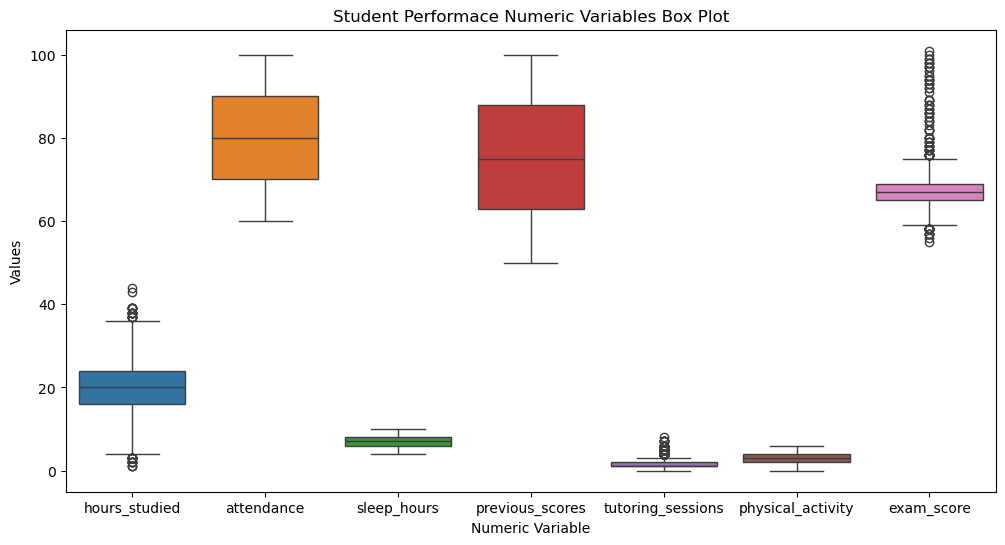

In [22]:
#boxplot of all numeric variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=spf)
plt.xlabel('Numeric Variable')
plt.ylabel('Values')
plt.title('Student Performace Numeric Variables Box Plot')
plt.show()

**It appears that hours studied, tutoring sessions, and exam score are the only variables with outliers. Next step is to plot them individually to see the outliers and determine what to do with them.**

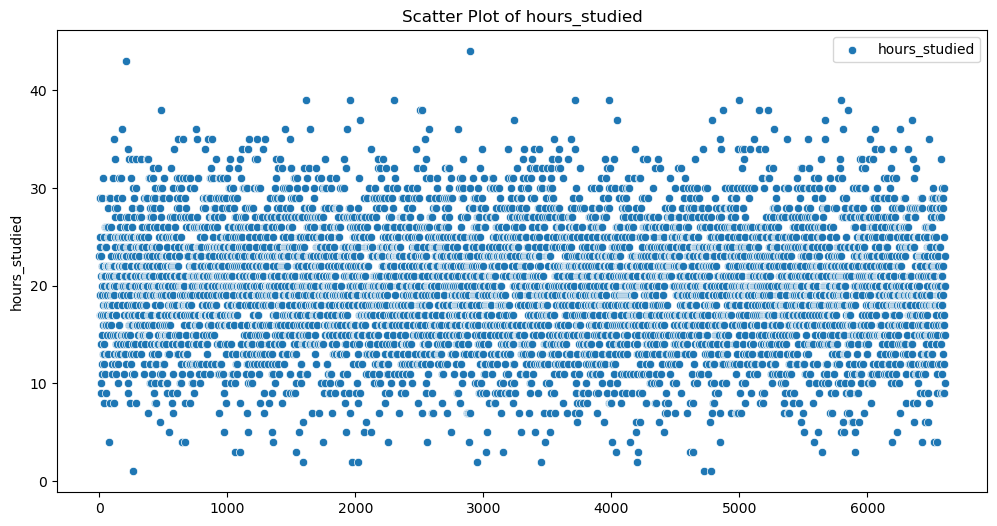

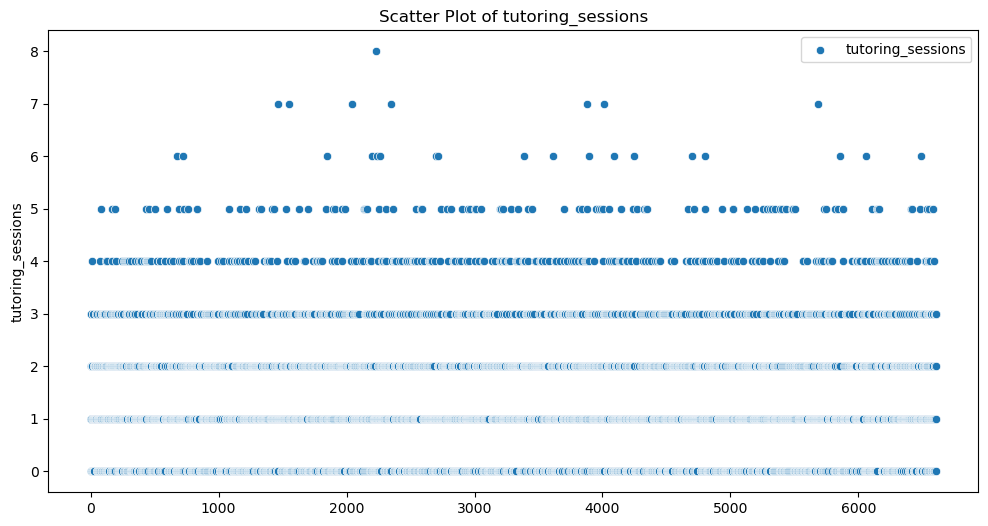

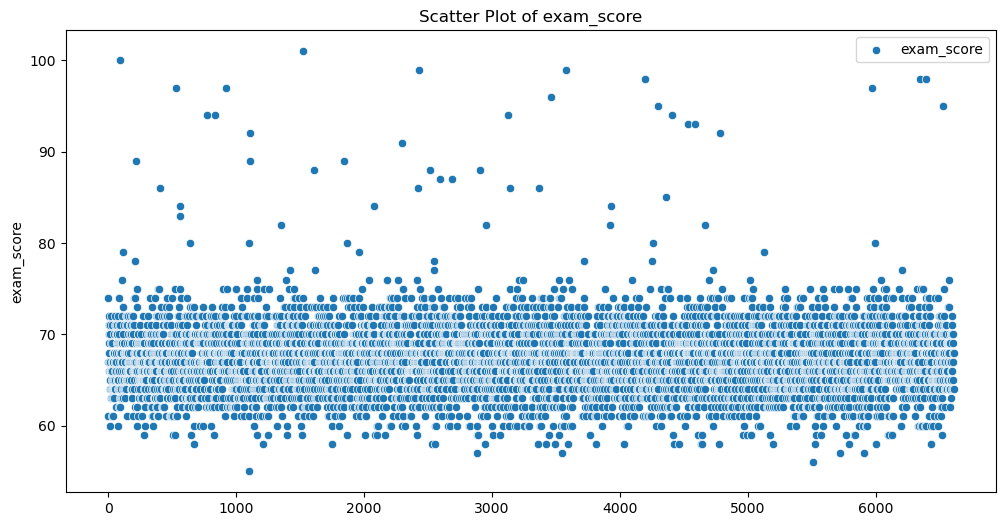

In [24]:
#creating list of variables of interest from the above found to have outliers
vars_of_int = ['hours_studied', 'tutoring_sessions', 'exam_score']

#highlighting these variables, in scatterplots
for var in vars_of_int:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=spf[var], label=var)
    plt.ylabel(var)
    plt.title(f'Scatter Plot of {var}')
plt.show()

<b>While there are outliers in these variables, logically there is no reason to remove them as they are valid datapoints gathered from students. Some students must have studied significantly more / had more tutoring sessions / received an above average exam score.</b>

## Univariate Analysis on Dependendant Variable (Exam Score)

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: exam_score, dtype: float64


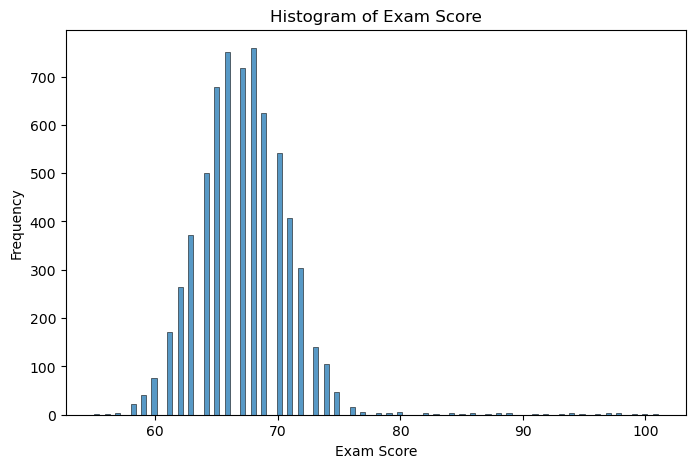

Skewness: 1.6448082853982677


In [27]:
#starting to look specifically at the dependent variable, exam score
print(spf['exam_score'].describe())

#histogram of exam score
plt.figure(figsize=(8, 5))
sns.histplot(spf['exam_score'])
plt.title('Histogram of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

#getting skewness
print(f'Skewness: {spf['exam_score'].skew()}')

<b>Exam score's mean and median values along with the min/max and other percentiles painted the data as being basically normal.  
After plotting the data in a histogram and checking the skewness we can see that while the data is almost normal, it is definitely skewed positively.</b>

## Bivariate Analysis on Numeric Variables

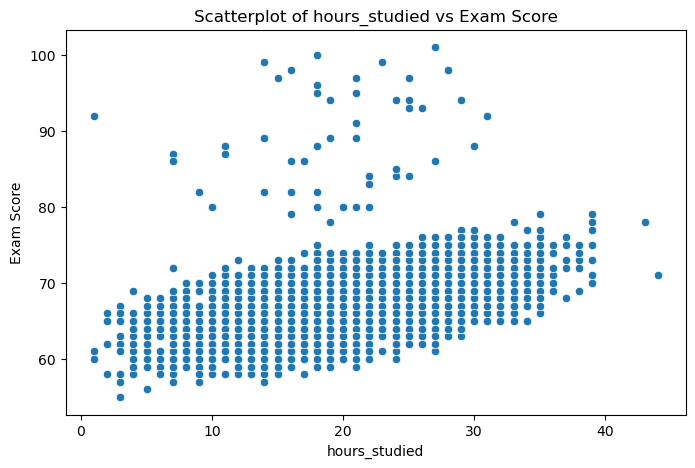

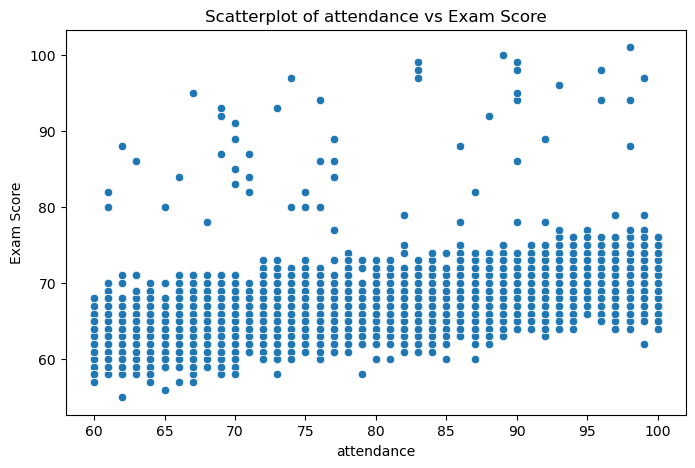

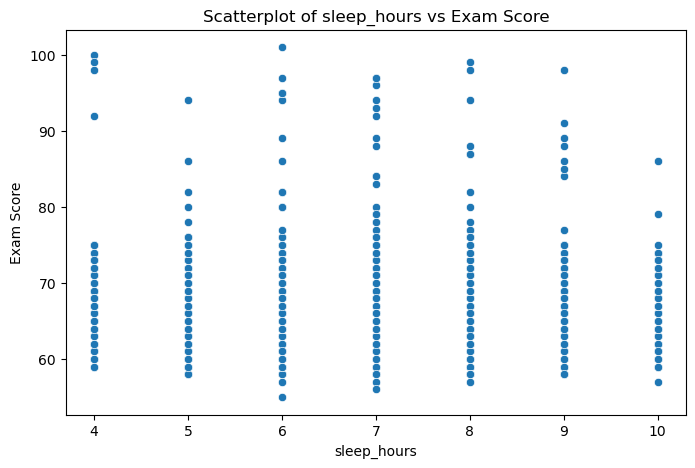

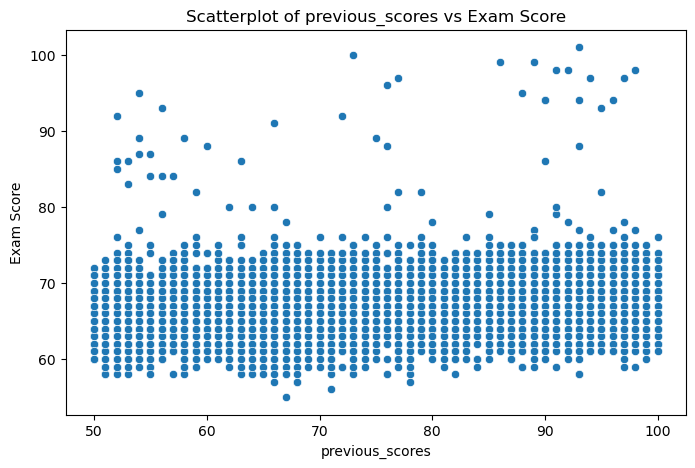

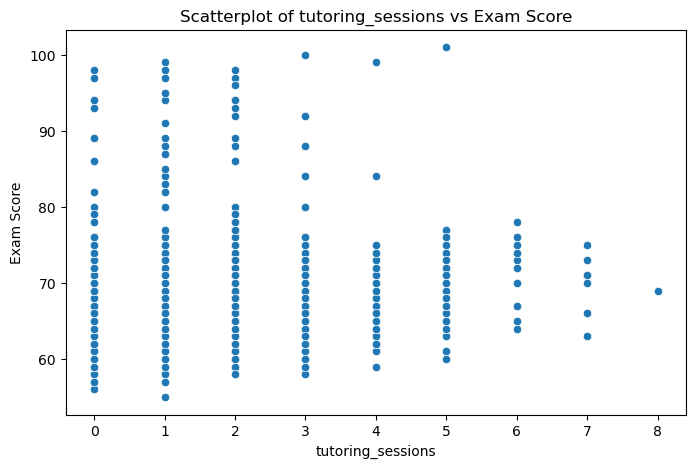

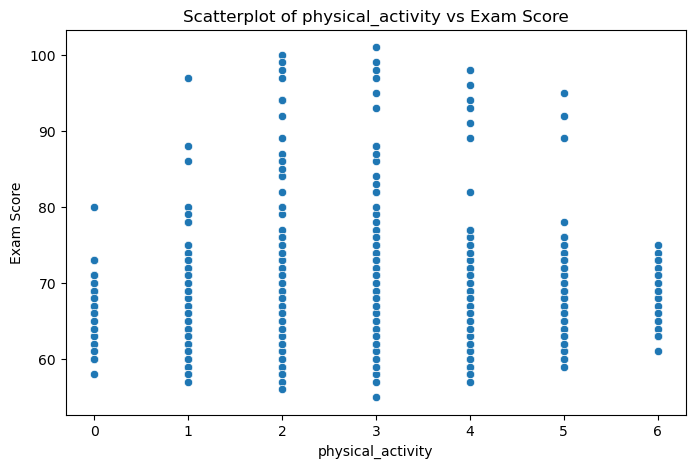

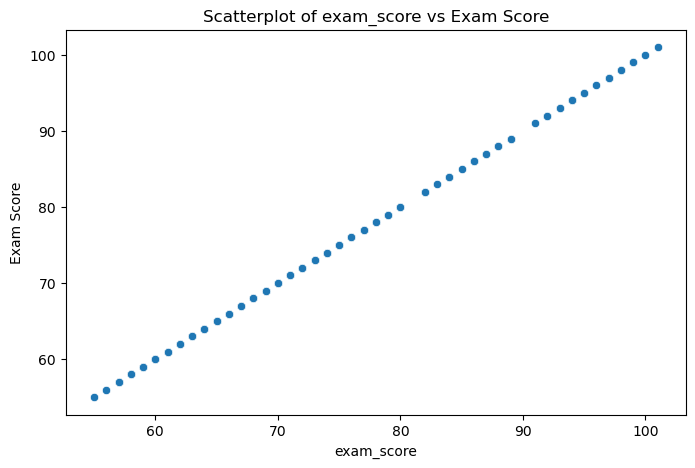

In [30]:
#create new dataframe for only numerical data
spf_numeric = spf.select_dtypes(include=['number'])

#plotting all numeric variables against exam score to look for trends
for column in spf_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=spf_numeric, x=column, y=spf_numeric['exam_score'])
    plt.title(f'Scatterplot of {column} vs Exam Score')
    plt.xlabel(column)
    plt.ylabel('Exam Score')
plt.show()

<b>These scatterplots show a potentially positive correlation between exam scores and hours studied, attendance, previous scores,  
tutoring sessions, and maybe physical activity. These are the numeric variables we will focus on in correlation analysis.</b>

## Bivariate Analysis of Categorical Variables

In [33]:
#create new dataframe for only categorical data and adding in the exam score column
spf_cat = spf.select_dtypes(include=['object'])
spf_cat = pd.merge(spf_cat, spf_numeric[['exam_score']], left_index=True, right_index=True)

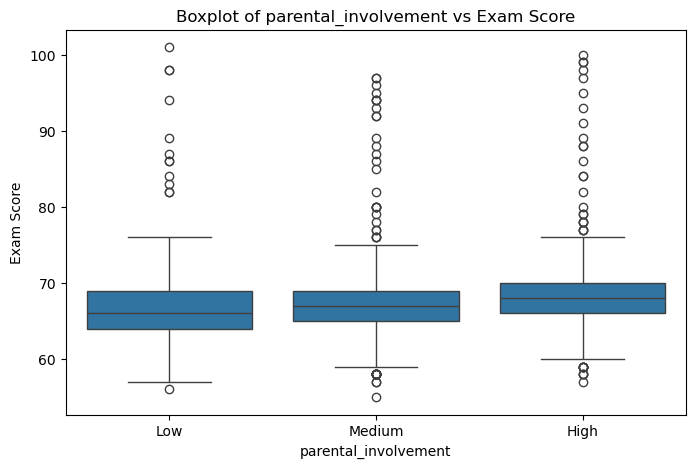

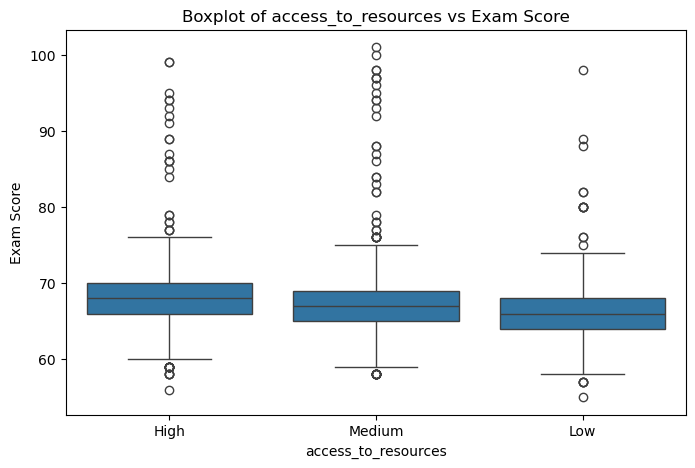

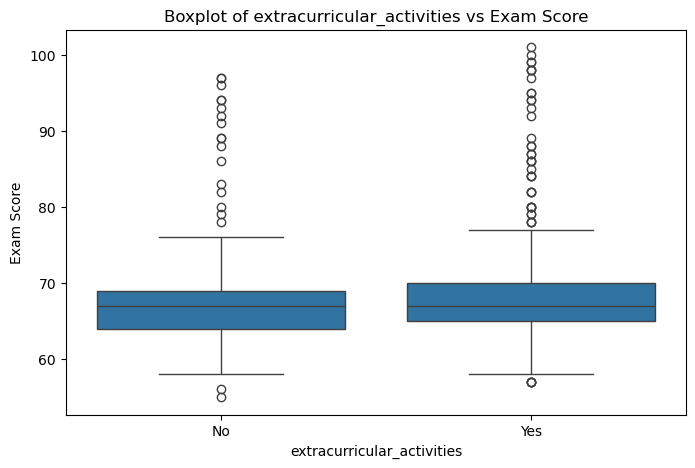

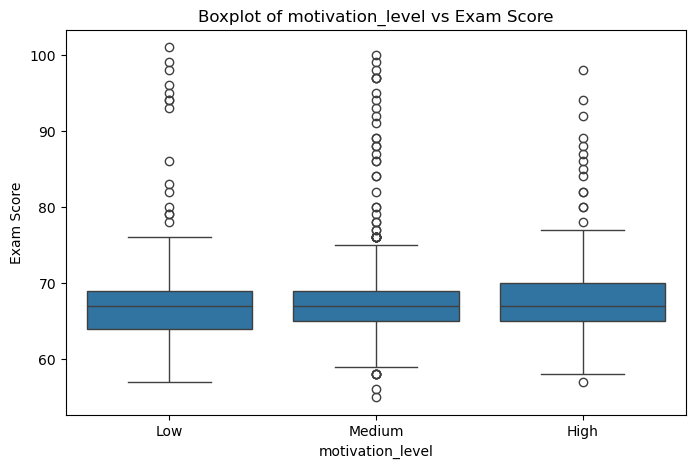

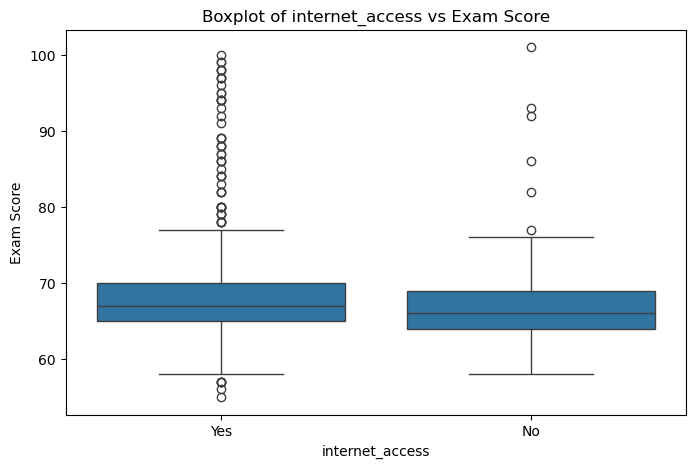

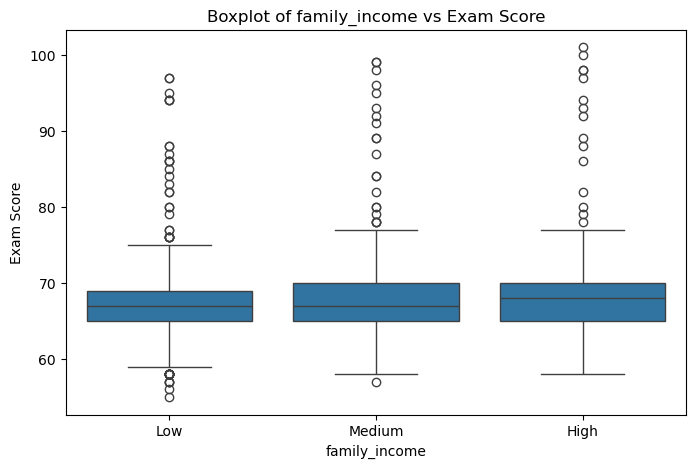

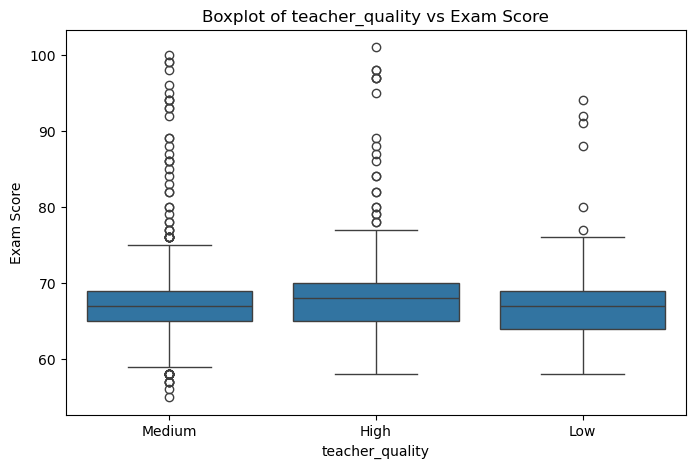

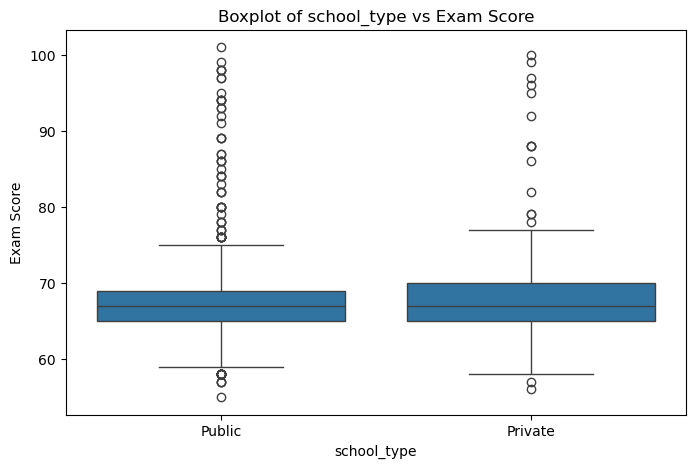

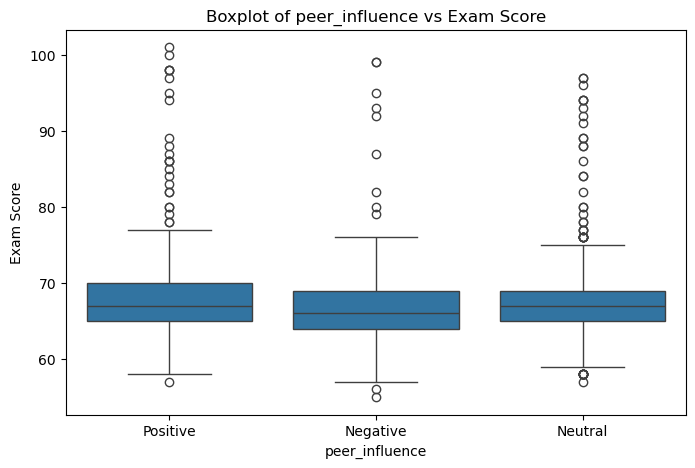

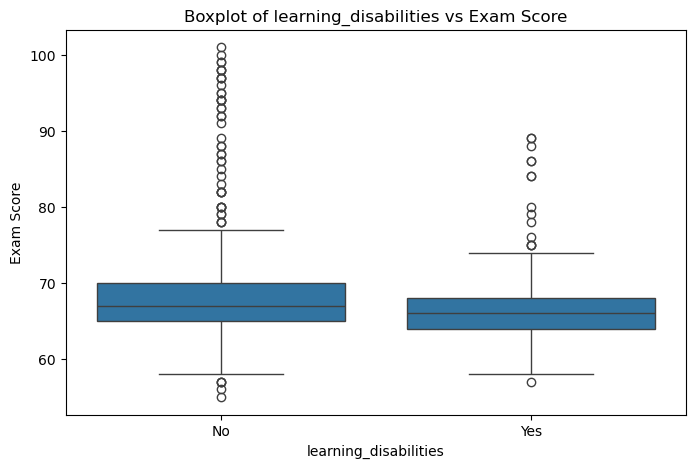

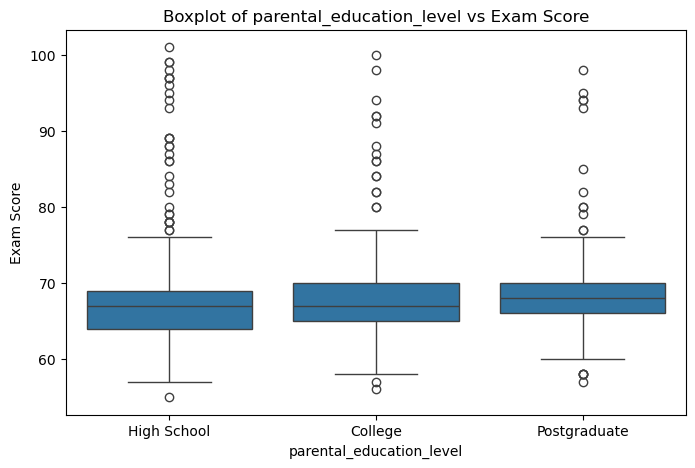

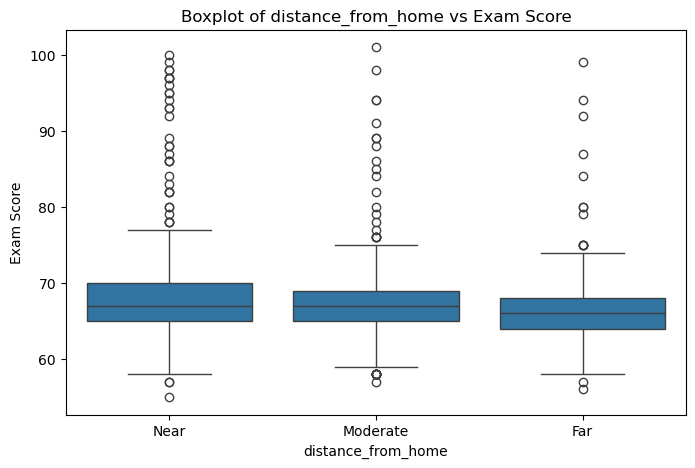

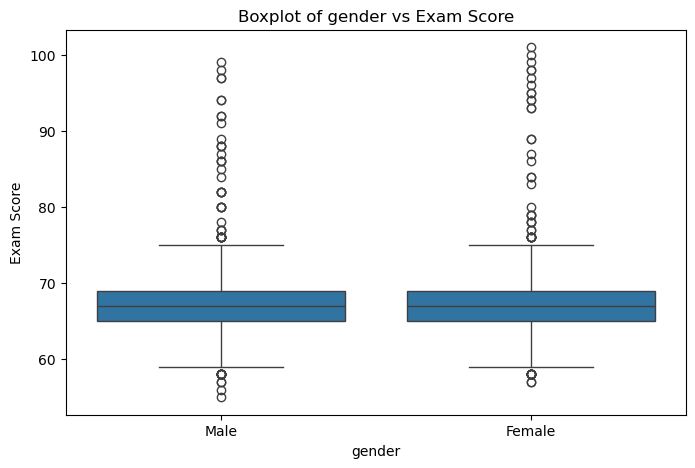

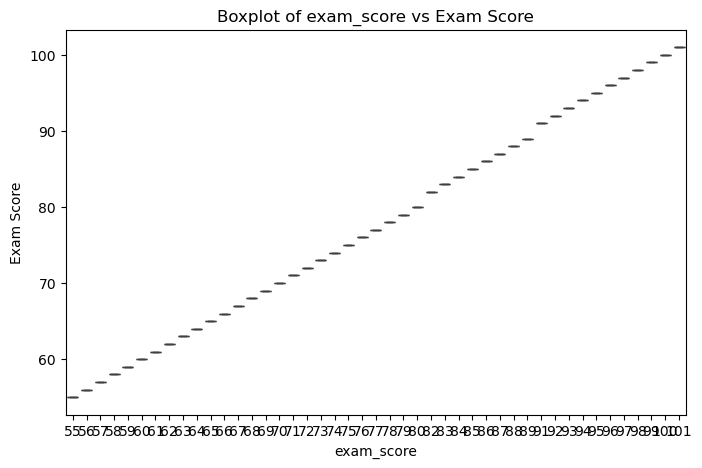

In [34]:
#plotting all categorical variables against exam score to look for trends
for column in spf_cat.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=spf_cat, x=column, y=spf_cat['exam_score'])
    plt.title(f'Boxplot of {column} vs Exam Score')
    plt.xlabel(column)
    plt.ylabel('Exam Score')
plt.show()

<b>These boxplots show a potential correlation between exam scores and parental involvement, access to resources, motivation level, parental education level, and maybe distance from home. These are the categorical variables we will focus on in correlation analysis.</b>

## Correlation Matrix of Numeric Variables Against Exam Score

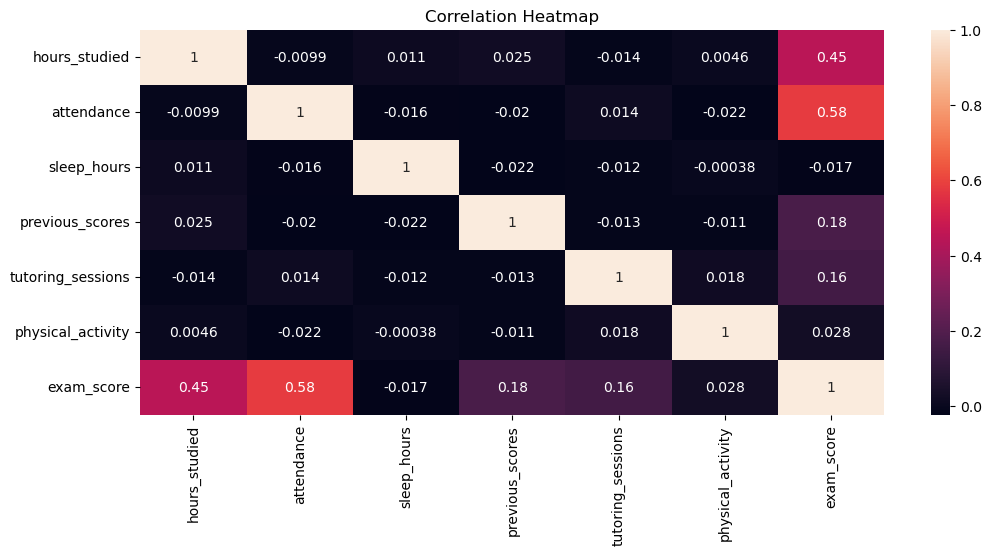

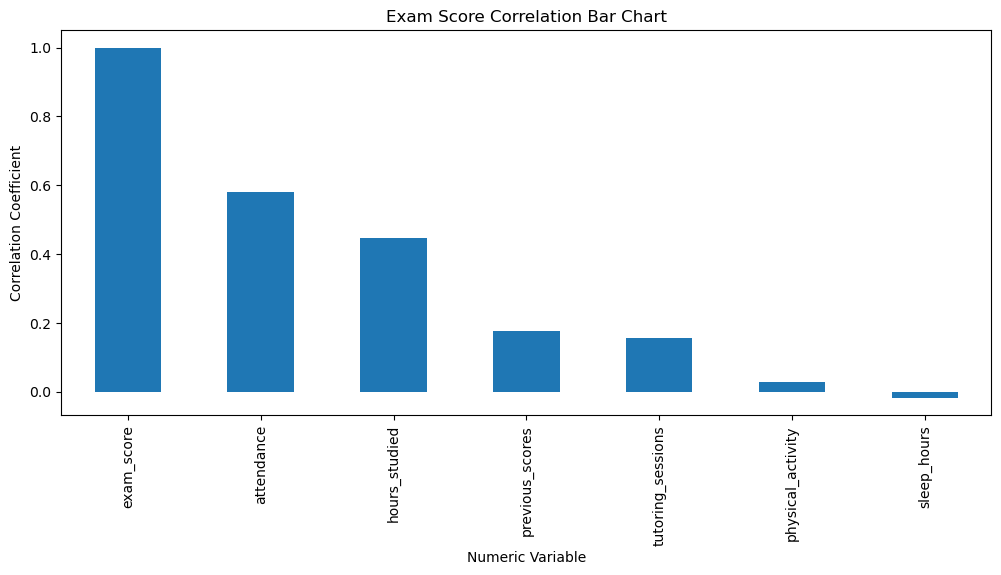

In [37]:
#create a new dataframe that's a correlation matrix of the numeric variables
spf_corr = spf_numeric.corr()

#plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(spf_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#new dataframe to only show correlation with exam score and sort the values from largest to smallest
df_exam_corr = spf_corr['exam_score'].sort_values(ascending=False)

#plotting this correlation coeffieciant data on a bar graph
plt.figure(figsize=(12, 5))
df_exam_corr.plot(kind='bar')
plt.title('Exam Score Correlation Bar Chart')
plt.xlabel('Numeric Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

<b>No variables seem to be colinear. Of these numeric variables, attendance (0.58) and hours studied (0.45) are the most strongly and positively  
correlated variables with exam score. However previous scores and tutoring sessions are also somewhat correlated.</b>

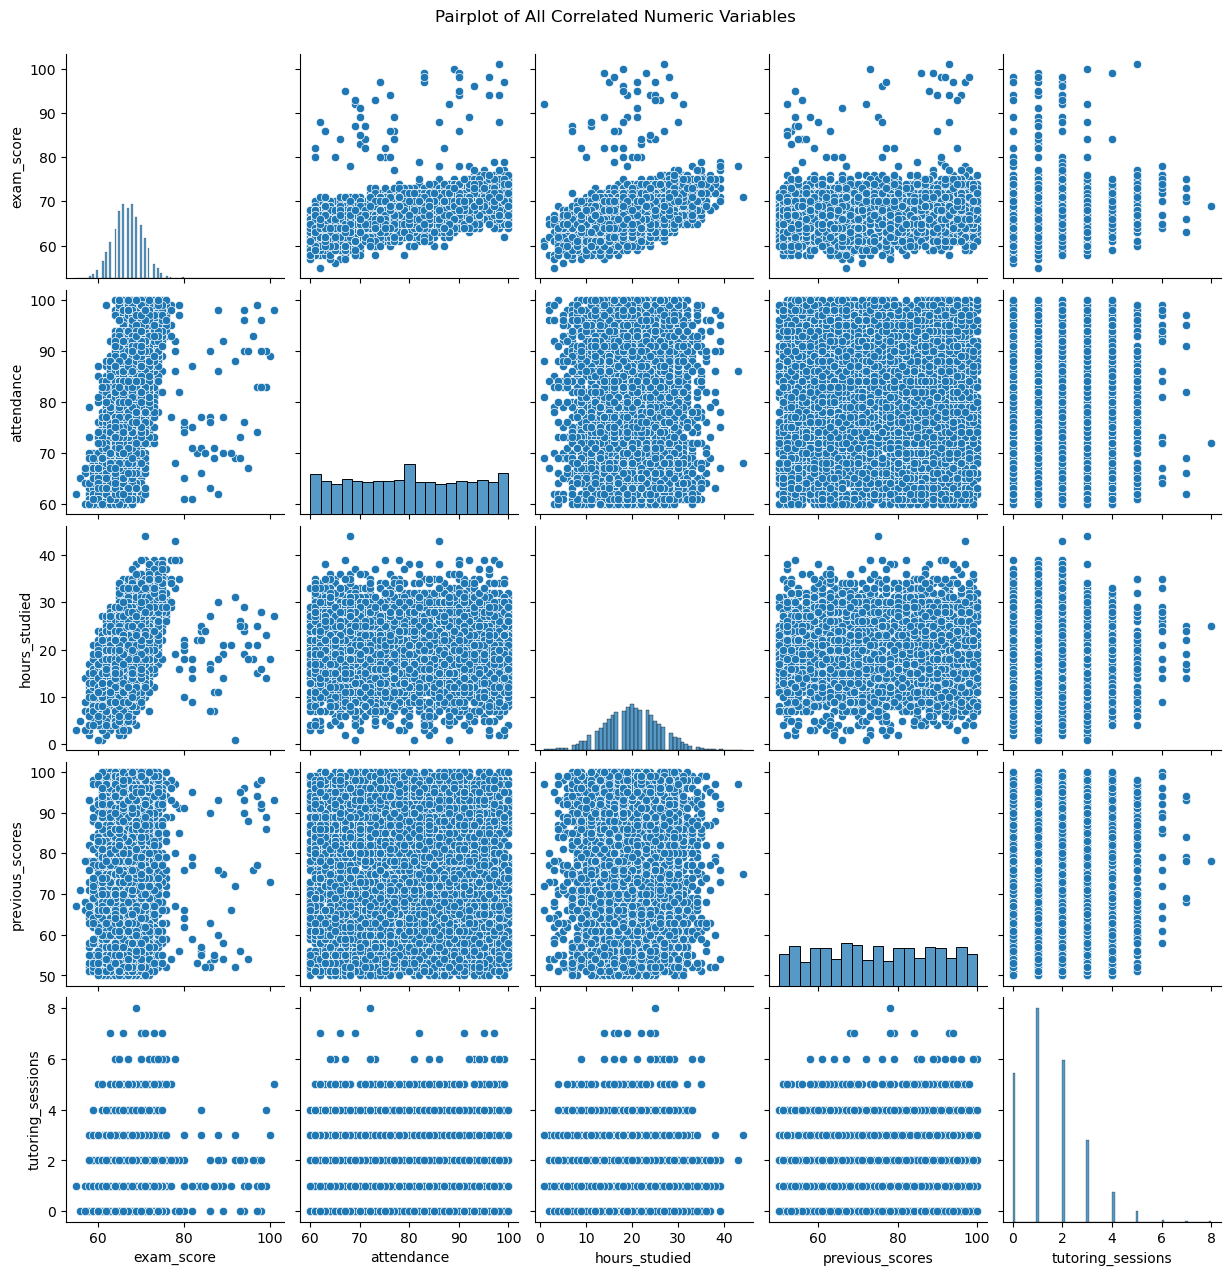

In [39]:
#set list of numeric variables to be plotted
num_cols = ['exam_score', 'attendance', 'hours_studied', 'previous_scores', 'tutoring_sessions']

#plotting all variables against each other to spot/verify trends
pairplot = sns.pairplot(spf_numeric[num_cols])
pairplot.fig.suptitle('Pairplot of All Correlated Numeric Variables', y=1.02)
plt.show()

<b>Looking specifically at the top row, the trend of the variables does seem to indicate the correlation shown in the heatmap.</b>

## Individual Numeric Variable Plots

<Figure size 1200x600 with 0 Axes>

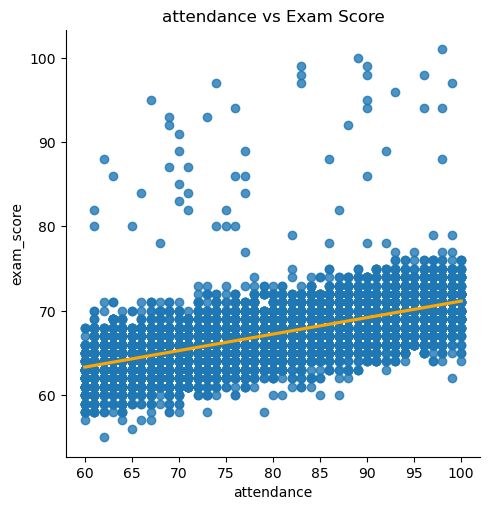

<Figure size 1200x600 with 0 Axes>

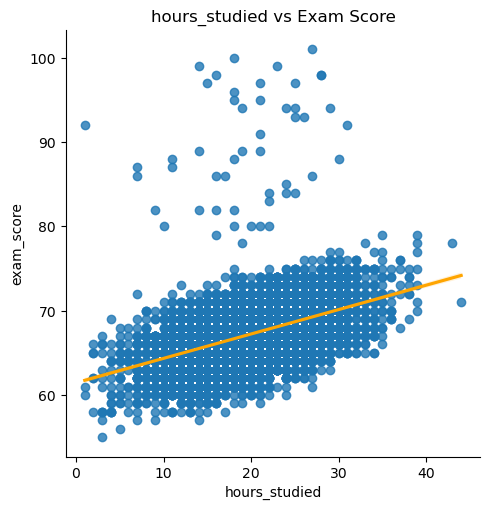

<Figure size 1200x600 with 0 Axes>

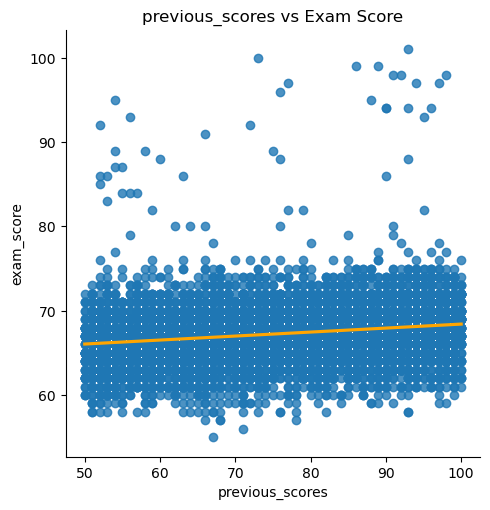

<Figure size 1200x600 with 0 Axes>

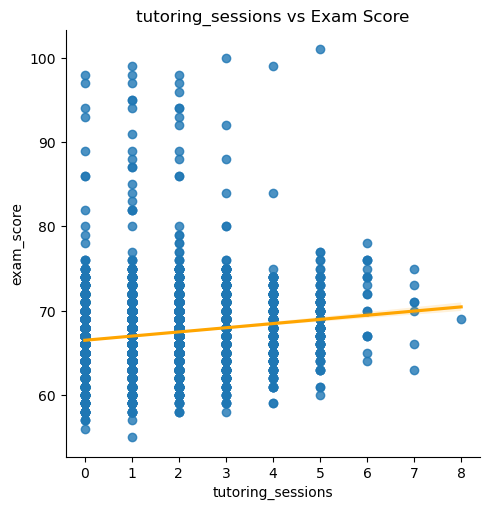

In [42]:
#scatterplot comparing attendance vs exam score with a linear regression model plotted
num_vars = ['attendance', 'hours_studied', 'previous_scores', 'tutoring_sessions']
for column in num_vars:
    plt.figure(figsize=(12,6))
    sns.lmplot(x=column, y='exam_score', data=spf, line_kws={'color': 'orange'})
    plt.title(f'{column} vs Exam Score')
    plt.show()


<b>Plotting each of the highly correlated numeric variables against exam score with a linear regression model plotted confirms there is a positive  
relationship (to various degrees) in all four variables.</b>

## **Categorical Data Exploration**

## Chi-sqaured Test for Categorical Variables

In [46]:
#create function to calculate and display Chi-squared information based on column input
def chi_sq(column): 
    contingency_table = pd.crosstab(spf[column], spf['exam_score'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared Test Results for \033[1m{column}\033[0m")
    print(f"Chi-squared Statistic: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print()
    print('*************************************************************************************************************************')
    print()
    

In [47]:
#for loop to run the chi-squared test for all categorical variables
for column in spf_cat.columns:
    chi_sq(column)

Chi-squared Test Results for parental_involvement
Chi-squared Statistic: 301.91
P-value: 0.0000
Degrees of Freedom: 88

*************************************************************************************************************************

Chi-squared Test Results for access_to_resources
Chi-squared Statistic: 357.79
P-value: 0.0000
Degrees of Freedom: 88

*************************************************************************************************************************

Chi-squared Test Results for extracurricular_activities
Chi-squared Statistic: 74.95
P-value: 0.0025
Degrees of Freedom: 44

*************************************************************************************************************************

Chi-squared Test Results for motivation_level
Chi-squared Statistic: 141.88
P-value: 0.0002
Degrees of Freedom: 88

*************************************************************************************************************************

Chi-squared Test Results for

<b>The Chi-squared test results show that all categorical variables are at least significant, with the exception of school type and gender  
as they are the only variables with a P-value > 0.05.</b>

## Mapping Categorical Variable Values to Numeric Values for Correlation Analysis

In [50]:
#creating a copy of the spf catergory dataframe so I can test mapping values without affecting the original spf_cat dataframe
spf_cattest = spf_cat.copy() 

#dropping exam score column
spf_cattest = spf_cattest.drop(columns=['exam_score'])

#verifying unique values
for column in spf_cattest.columns:
    unique_values = spf_cattest[column].unique()  
    print(f'Values in {column}: {unique_values}')

Values in parental_involvement: ['Low' 'Medium' 'High']
Values in access_to_resources: ['High' 'Medium' 'Low']
Values in extracurricular_activities: ['No' 'Yes']
Values in motivation_level: ['Low' 'Medium' 'High']
Values in internet_access: ['Yes' 'No']
Values in family_income: ['Low' 'Medium' 'High']
Values in teacher_quality: ['Medium' 'High' 'Low' nan]
Values in school_type: ['Public' 'Private']
Values in peer_influence: ['Positive' 'Negative' 'Neutral']
Values in learning_disabilities: ['No' 'Yes']
Values in parental_education_level: ['High School' 'College' 'Postgraduate' nan]
Values in distance_from_home: ['Near' 'Moderate' 'Far' nan]
Values in gender: ['Male' 'Female']


In [51]:
#mapping each unique value in each column to their numeric equivalents
spf_cattest['parental_involvement'] = spf_cattest['parental_involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
spf_cattest['access_to_resources'] = spf_cattest['access_to_resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
spf_cattest['extracurricular_activities'] = spf_cattest['extracurricular_activities'].map({'No': 0, 'Yes': 1})
spf_cattest['motivation_level'] = spf_cattest['motivation_level'].map({'Low': 1, 'Medium': 2, 'High': 3})
spf_cattest['internet_access'] = spf_cattest['internet_access'].map({'No': 0, 'Yes': 1})
spf_cattest['family_income'] = spf_cattest['family_income'].map({'Low': 1, 'Medium': 2, 'High': 3})
spf_cattest['teacher_quality'] = spf_cattest['teacher_quality'].map({'Low': 1, 'Medium': 2, 'High': 3})
spf_cattest['school_type'] = spf_cattest['school_type'].map({'Public': 0, 'Private': 1})
spf_cattest['peer_influence'] = spf_cattest['peer_influence'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})
spf_cattest['learning_disabilities'] = spf_cattest['learning_disabilities'].map({'No': 0, 'Yes': 1})
spf_cattest['parental_education_level'] = spf_cattest['parental_education_level'].map({'High School': 1, 'College': 2, 'Postgraduate': 3})
spf_cattest['distance_from_home'] = spf_cattest['distance_from_home'].map({'Near': 1, 'Moderate': 2, 'Far': 3})
spf_cattest['gender'] = spf_cattest['gender'].map({'Female': 0, 'Male': 1})

#verifying the change
spf_cattest

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender
0,1,3,0,1,1,1,2.0,0,1,0,1.0,1.0,1
1,1,2,0,1,1,2,2.0,0,-1,0,2.0,2.0,0
2,2,2,1,2,1,2,2.0,0,0,0,3.0,1.0,1
3,1,2,1,2,1,2,2.0,0,-1,0,1.0,2.0,1
4,2,2,1,2,1,2,3.0,0,0,0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,3,2,0,2,1,3,2.0,0,1,0,1.0,1.0,0
6603,3,2,0,2,1,1,3.0,0,1,0,1.0,1.0,0
6604,2,1,1,1,1,1,2.0,0,-1,0,3.0,1.0,0
6605,3,3,1,3,1,1,2.0,1,1,0,1.0,3.0,0


In [52]:
#merging exam score back into the mapped categorical dataframe
spf_cattest = pd.merge(spf_cattest, spf_numeric[['exam_score']], left_index=True, right_index=True)


## Correlation Analysis for Categorical Variables

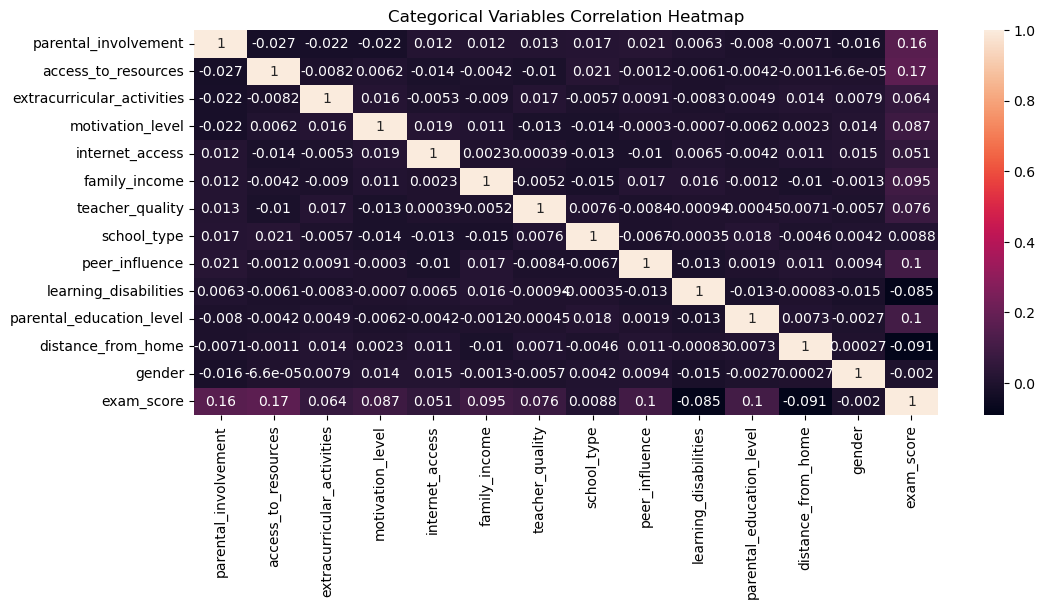

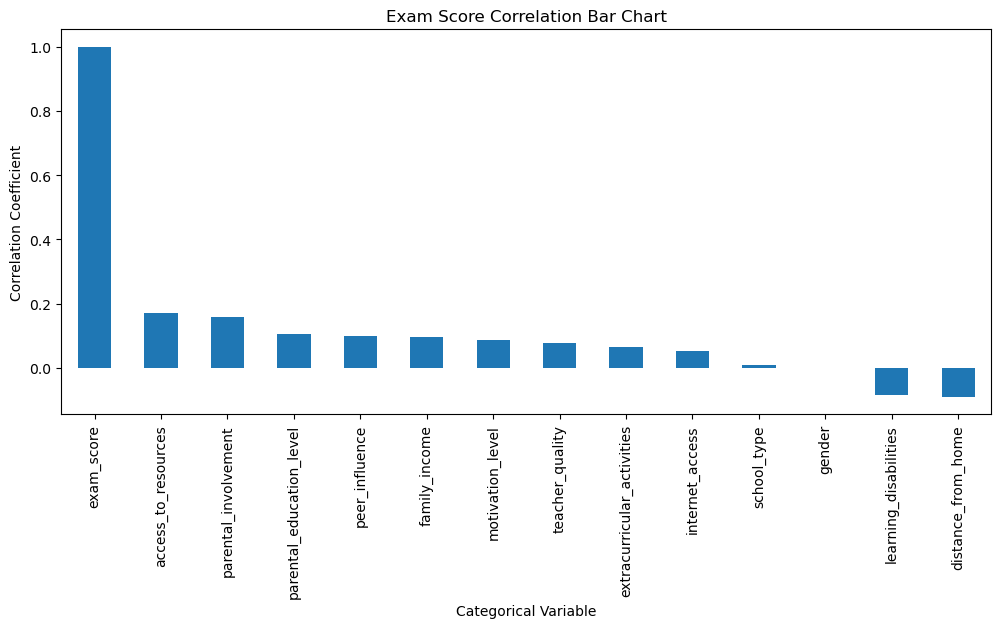

In [54]:
#test correlation of mapped categorical values with exam score
spf_cattest_corr = spf_cattest.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(spf_cattest_corr, annot=True)
plt.title('Categorical Variables Correlation Heatmap')
plt.show()

#new dataframe to only show correlation with exam score and sort the values from largest to smallest
cat_exam_corr = spf_cattest_corr['exam_score'].sort_values(ascending=False)

#plotting this correlation coeffieciant data on a bar graph
plt.figure(figsize=(12, 5))
cat_exam_corr.plot(kind='bar')
plt.title('Exam Score Correlation Bar Chart')
plt.xlabel('Categorical Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

<b>No variables seem to be colinear. Of these categorical variables, access to resources (0.17) and parental involvement (0.16) are the most  
strongly and positively correlated variables with exam score. However parental education level, peer influence, family income, motivation level, and teacher quality are also somewhat correlated.</b>

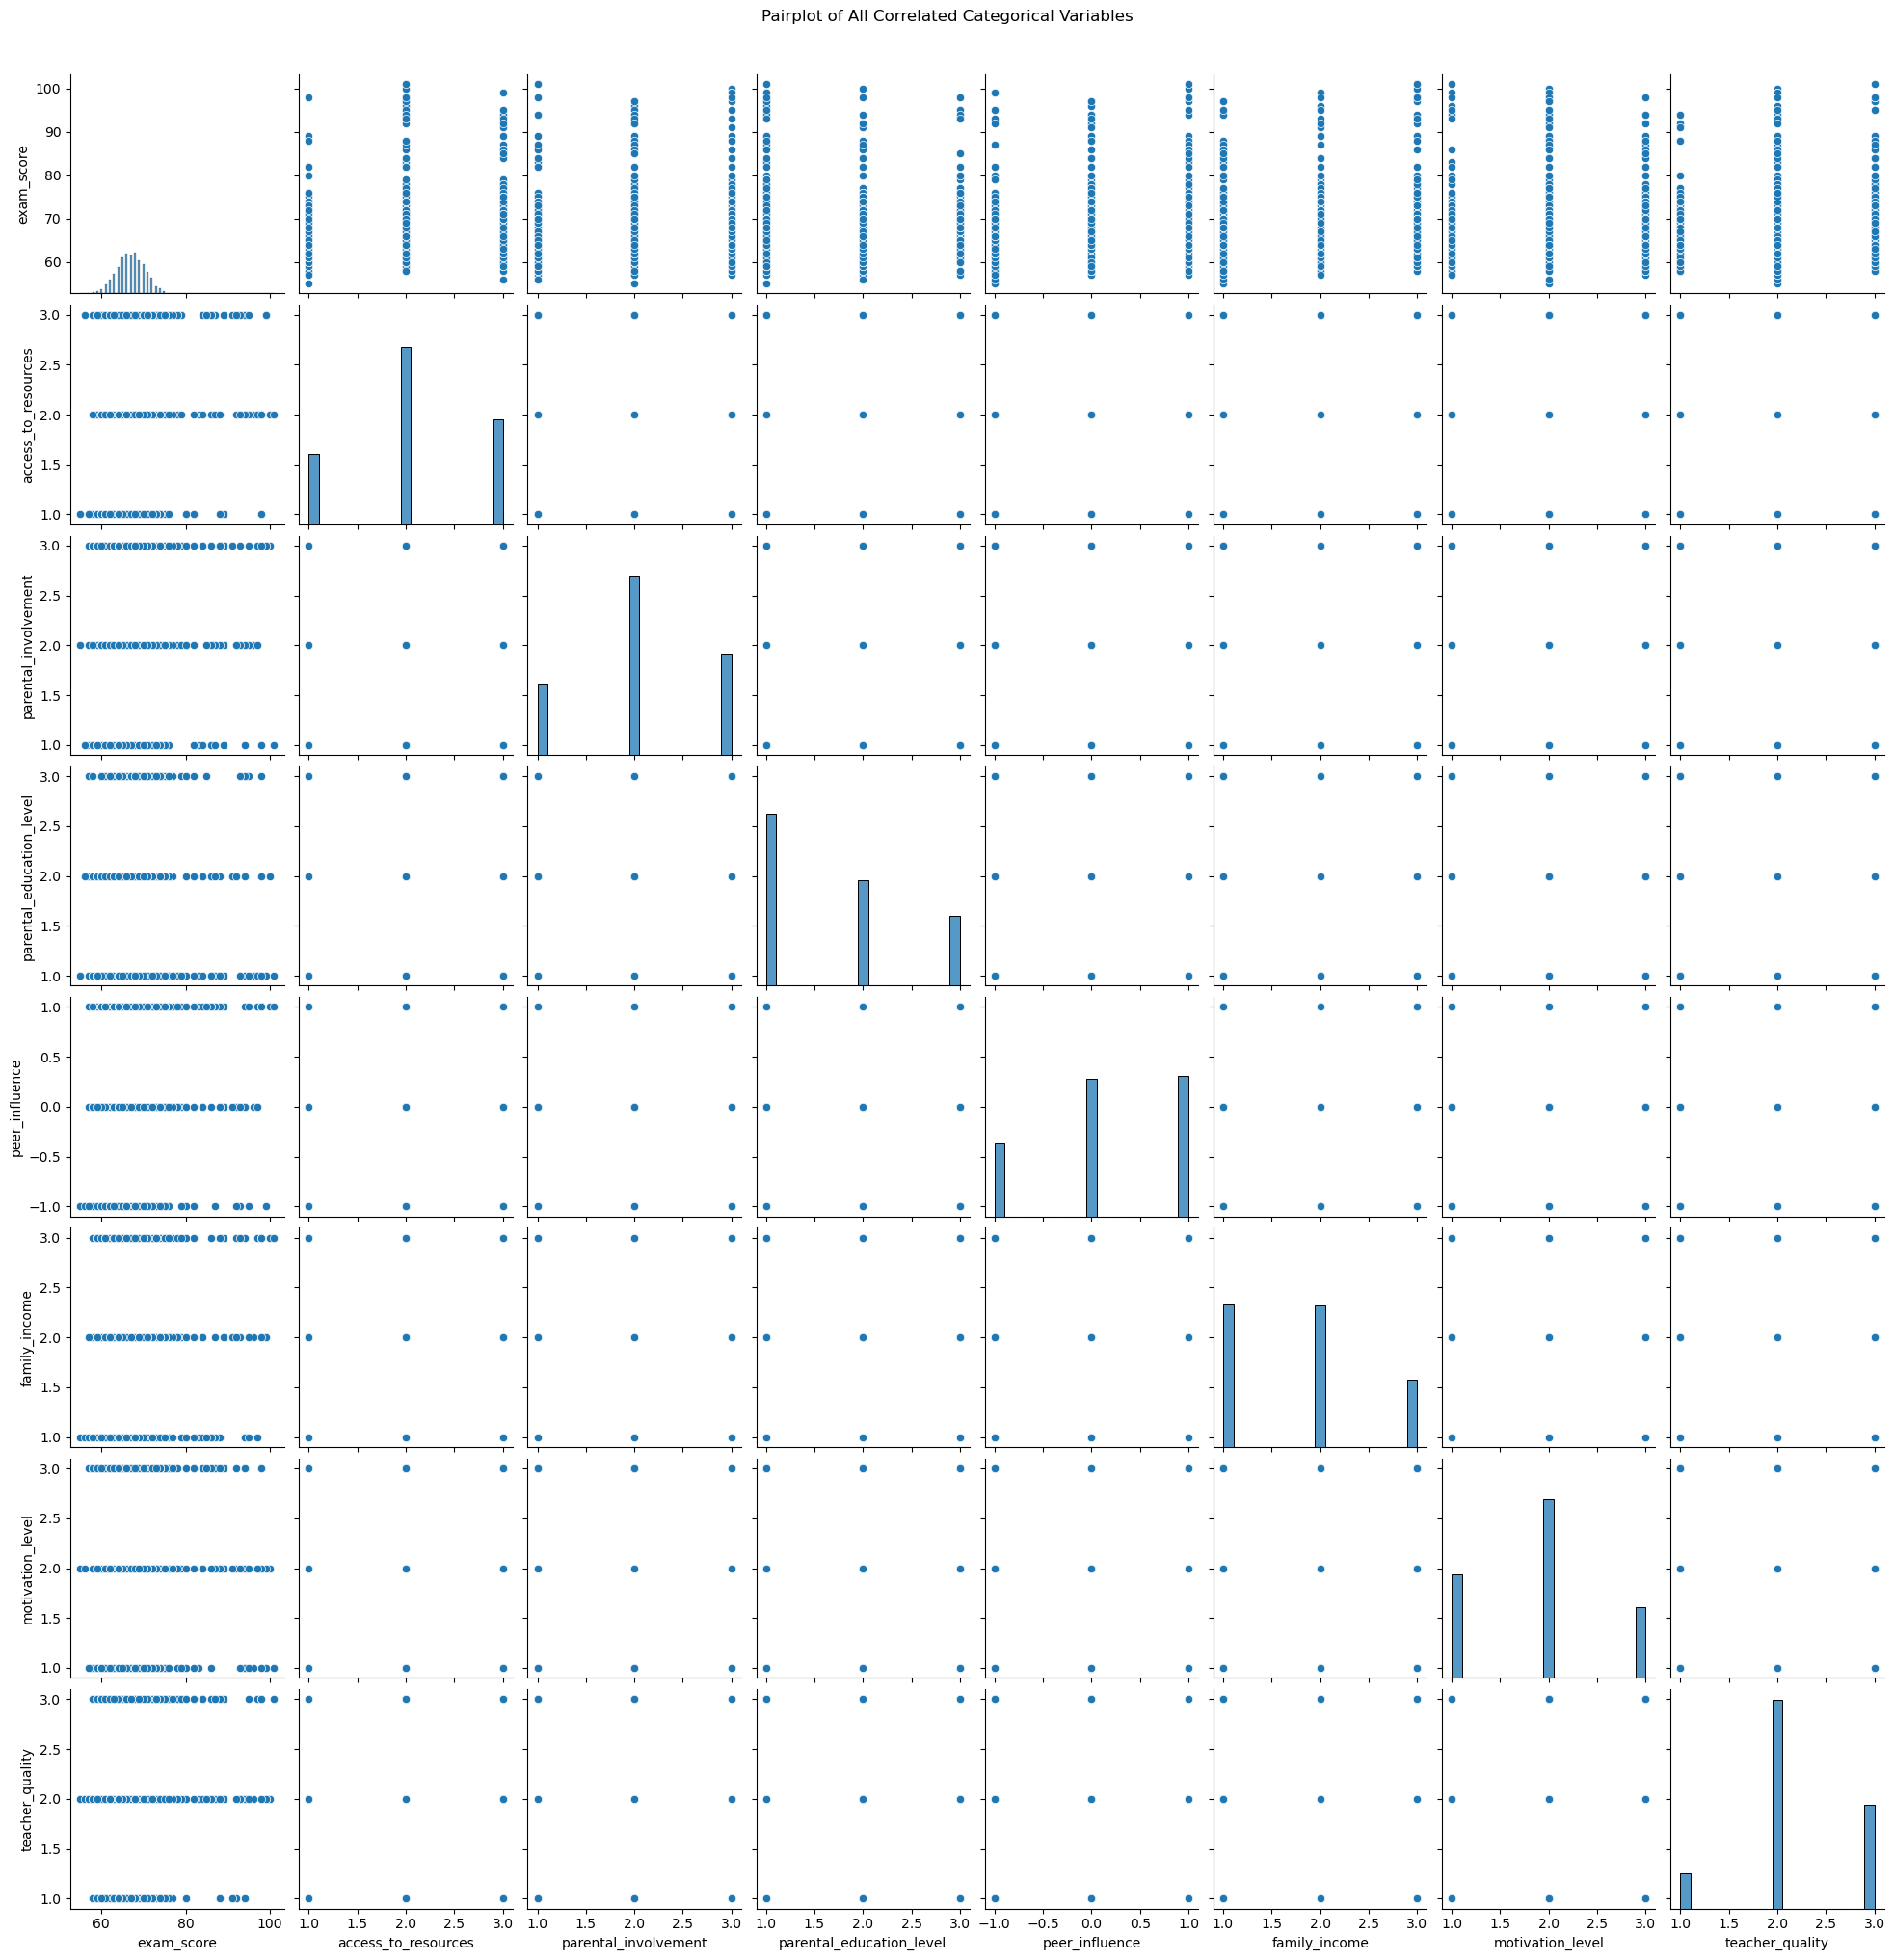

In [56]:
#set list of categorical variables to be plotted
cat_cols = ['exam_score', 'access_to_resources', 'parental_involvement', 'parental_education_level', 'peer_influence', 'family_income'
            , 'motivation_level', 'teacher_quality']

#plotting all variables against each other to spot/verify trends
pairplot = sns.pairplot(spf_cattest[cat_cols])
pairplot.fig.suptitle('Pairplot of All Correlated Categorical Variables', y=1.02)
plt.show()

## Checking Normality and Transforming Data

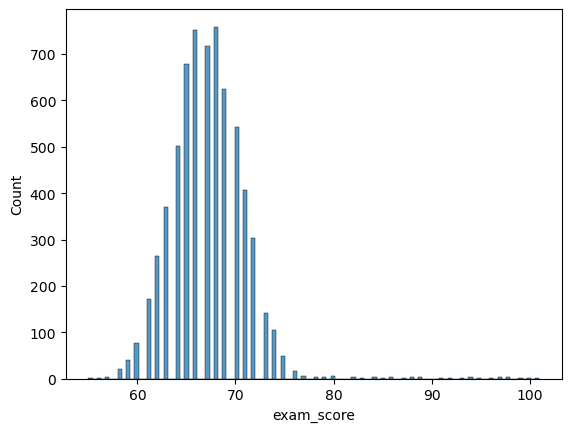

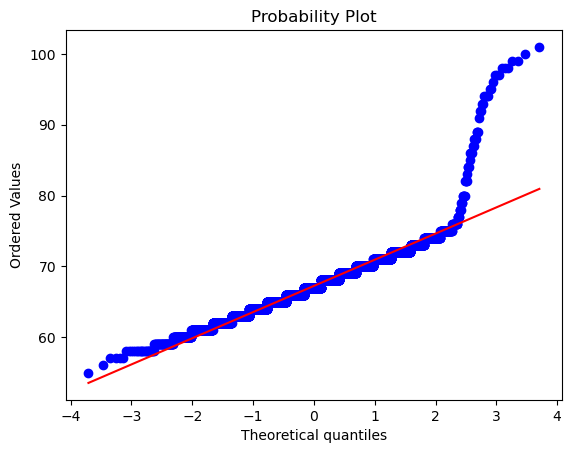

In [58]:
#plotting a histogram and probability plot of exam score
sns.histplot(spf_numeric['exam_score'])
fig = plt.figure()
pp = stats.probplot(spf_numeric['exam_score'], plot=plt)

In [59]:
#creating a new column for exam score log
spf_numeric['log_exam_score'] = np.log(spf_numeric['exam_score'])
spf_numeric.head()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score,log_exam_score
0,23,84,7,73,0,3,67,4.204693
1,19,64,8,59,2,4,61,4.110874
2,24,98,7,91,2,4,74,4.304065
3,29,89,8,98,1,4,71,4.262680
4,19,92,6,65,3,4,70,4.248495


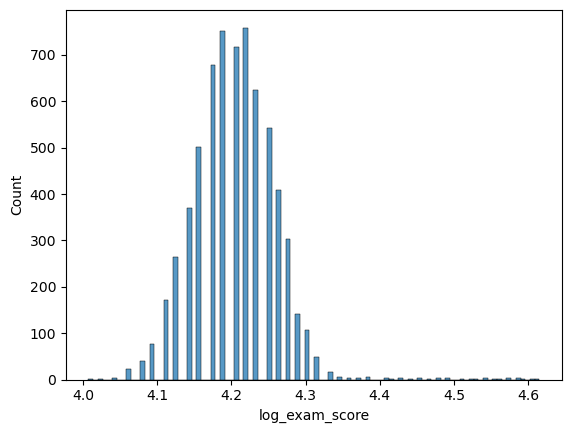

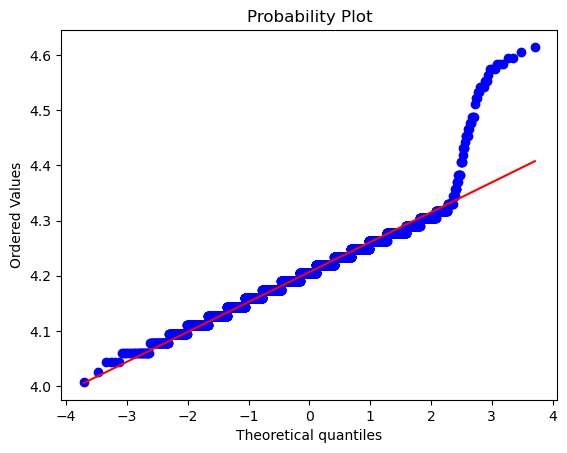

In [60]:
#plotting a histogram and probability plot of log exam score
sns.histplot(spf_numeric['log_exam_score'])
fig = plt.figure()
pp = stats.probplot(spf_numeric['log_exam_score'], plot=plt)

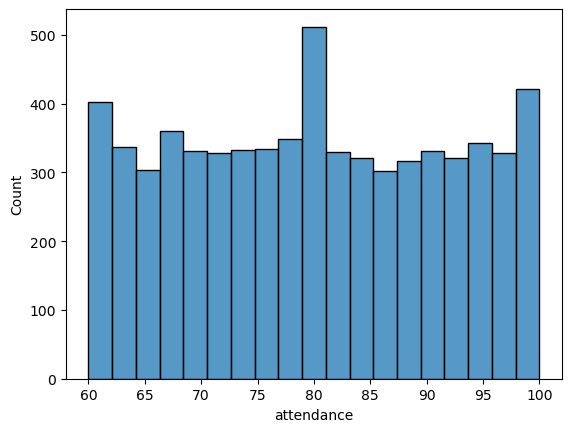

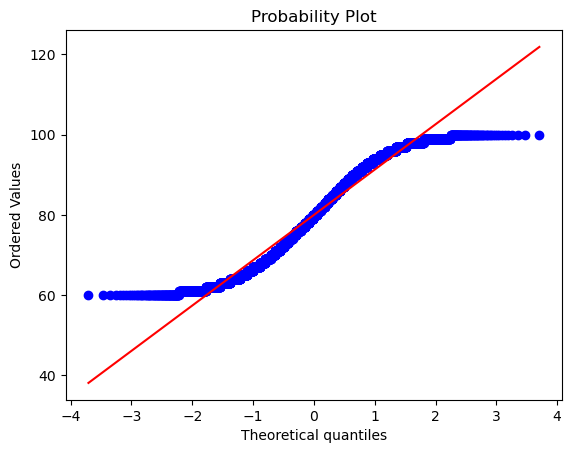

In [61]:
#plotting a histogram and probability plot of attendance
sns.histplot(spf_numeric['attendance'])
fig = plt.figure()
pp = stats.probplot(spf_numeric['attendance'], plot=plt)

In [62]:
#creating a new column for attendance log
spf_numeric['log_attendance'] = np.log(spf_numeric['attendance'])
spf_numeric.head()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score,log_exam_score,log_attendance
0,23,84,7,73,0,3,67,4.204693,4.430817
1,19,64,8,59,2,4,61,4.110874,4.158883
2,24,98,7,91,2,4,74,4.304065,4.584967
3,29,89,8,98,1,4,71,4.262680,4.488636
4,19,92,6,65,3,4,70,4.248495,4.521789


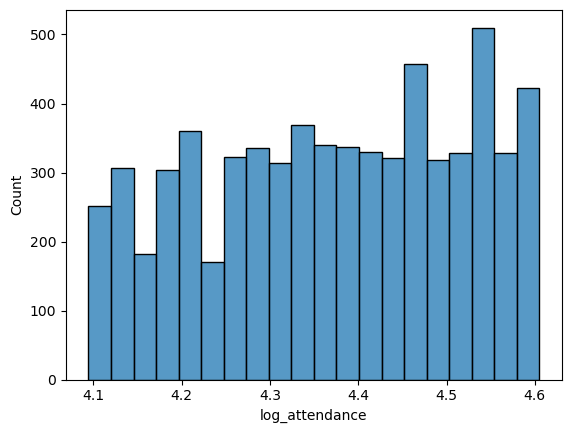

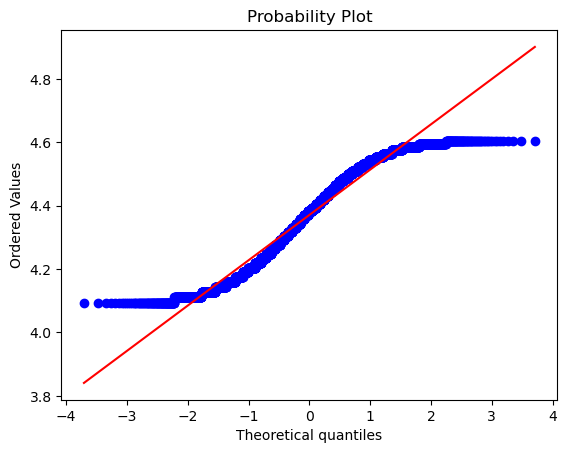

In [63]:
#plotting a histogram and probability plot of log attendance
sns.histplot(spf_numeric['log_attendance'])
fig = plt.figure()
pp = stats.probplot(spf_numeric['log_attendance'], plot=plt)

<b>It looks like transforming the data did not make a difference to its skewdness. Moving forward with regression.</b>

In [65]:
#removing log columns from spf_numeric
spf_numeric = spf_numeric.drop(columns=['log_exam_score', 'log_attendance'])
spf_numeric.head()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


## **OLS Regression**

In [67]:
#removing the exam score column from spf_cattest so when I combine the num/cat dfs there isn't a duplicate
spf_catnum = spf_cattest.drop(columns=['exam_score'])

#creating a new df to combine the numeric and mapped-categorical variables into one df 
allvars_numeric = pd.merge(spf_catnum, spf_numeric, left_index=True, right_index=True)

#verifying the correct columns are all included
allvars_numeric.head()

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,1,3,0,1,1,1,2.0,0,1,0,1.0,1.0,1,23,84,7,73,0,3,67
1,1,2,0,1,1,2,2.0,0,-1,0,2.0,2.0,0,19,64,8,59,2,4,61
2,2,2,1,2,1,2,2.0,0,0,0,3.0,1.0,1,24,98,7,91,2,4,74
3,1,2,1,2,1,2,2.0,0,-1,0,1.0,2.0,1,29,89,8,98,1,4,71
4,2,2,1,2,1,2,3.0,0,0,0,2.0,1.0,0,19,92,6,65,3,4,70


In [68]:
#choosing significant variables to add to the model, only choosing the 2 highest correlated from num/cat
sig_vars = ['attendance', 'hours_studied', 'access_to_resources', 'parental_involvement']

dependent_variable = allvars_numeric['exam_score']
independent_variables = allvars_numeric[sig_vars]
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2515.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:39:04   Log-Likelihood:                -15292.
No. Observations:                6607   AIC:                         3.059e+04
Df Residuals:                    6602   BIC:                         3.063e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.2633 

<b>With an R-squared of 0.6 this model is well suited to this data, explaining 60% of exam score's variation. The next step is to test different  
combinations of variables to see if any produce a higher R-squared.</b>

In [70]:
#dropping all null value rows bc the ones with nan stopped the regression from running
allvars_numeric.dropna(inplace=True)
allvars_numeric.isnull().sum()

parental_involvement          0
access_to_resources           0
extracurricular_activities    0
motivation_level              0
internet_access               0
family_income                 0
teacher_quality               0
school_type                   0
peer_influence                0
learning_disabilities         0
parental_education_level      0
distance_from_home            0
gender                        0
hours_studied                 0
attendance                    0
sleep_hours                   0
previous_scores               0
tutoring_sessions             0
physical_activity             0
exam_score                    0
dtype: int64

In [71]:
#choosing more significant variables to add to the model
ad_cols = ['sleep_hours', 'previous_scores', 'tutoring_sessions', 'physical_activity', 'parental_education_level', 'peer_influence', 'family_income'
           , 'motivation_level', 'teacher_quality']

#loop through OLS models with each one only differing by the addition of one more variable
for column in ad_cols:
    sig_vars = ['attendance', 'hours_studied', 'access_to_resources', 'parental_involvement', column]
    dependent_variable = allvars_numeric['exam_score']
    independent_variables = allvars_numeric[sig_vars]
    independent_variables = sm.add_constant(independent_variables)
    regression_model = sm.OLS(dependent_variable, independent_variables).fit()
    print(f'\033[1mRegression for model with {column}\033[0m')
    print(regression_model.summary())
    print('\033[1m**************************************************************************************************************************************\033[0m')
    print()

Regression for model with sleep_hours
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1900.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:39:04   Log-Likelihood:                -14842.
No. Observations:                6378   AIC:                         2.970e+04
Df Residuals:                    6372   BIC:                         2.974e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

<b>Previous scores gives a slightly higher R-squared of 0.63, but has a MUCH higher condition number indicating colinearity.  
Tutoring sessions gives a slightly higher R-squared of 0.62 and has a similar condition number.  
No other combination of variables gave a higher R-squared so the preferred model is now listed below.<b>

In [73]:
#finalized significant variables
sig_vars = ['attendance', 'hours_studied', 'access_to_resources', 'parental_involvement', 'tutoring_sessions']

dependent_variable = allvars_numeric['exam_score']
independent_variables = allvars_numeric[sig_vars]
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     2109.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:39:05   Log-Likelihood:                -14640.
No. Observations:                6378   AIC:                         2.929e+04
Df Residuals:                    6372   BIC:                         2.933e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.5416 

## **Making Predictions**

In [75]:
#desired increase in exam score
score_increase = 10

#pull out coefficients from model
var_coeffs = regression_model.params

#calculate the required changes in independent variables
required_changes = {}

for column in sig_vars:
    required_change = score_increase / var_coeffs[column]
    required_changes[column] = required_change

for column, change in required_changes.items():
    print(f'To increase exam scores by {score_increase}-points, "{column}" needs to increase by {change:.2f}.')
    

To increase exam scores by 10-points, "attendance" needs to increase by 50.50.
To increase exam scores by 10-points, "hours_studied" needs to increase by 33.77.
To increase exam scores by 10-points, "access_to_resources" needs to increase by 9.69.
To increase exam scores by 10-points, "parental_involvement" needs to increase by 10.23.
To increase exam scores by 10-points, "tutoring_sessions" needs to increase by 20.02.


<b>These results indicate that access to resources, followed by parental involvement, then tutoring sessions are the variables which  
require the least amount of change to effect a result on exam scores. The next step is to determine a balance of those factors.</b>

## **Balancing Predictive Variables**

In [78]:
#define changes in independent variables, i.e. increasing attendance by 5, hours studied by 2, etc
changes = {'attendance': 2, 'hours_studied': 2, 'access_to_resources': 5, 'parental_involvement': 2, 'tutoring_sessions': 4}

#get coefficients
coeffs = regression_model.params

#calculate resulting change in the dependent variable
resulting_change = 0

for column in sig_vars:
    change = changes.get(column)
    resulting_change += change * coeffs[column]

print(f'Based on the defined variable changes, the expected change in exam scores is: {resulting_change:.2f}')

Based on the defined variable changes, the expected change in exam scores is: 10.10


## **Conclusions:**

It appears that the most heavily weighted variables which affect student exam scores are:
1) Access to Resources
2) Parental Involvement
3) Tutoring Sessions
4) Hours Studied
5) Attendance


## Strategies to increase Access to Resources:

* Involve the school librarian (media specialist) to showcase the resources the school already has that are underused
* Petition for grants to increase educational resources (added computers, modern textbooks, etc) 

## Strategies to increase Parental Involvement:

* Increase the availability of, or parental knowledge of, translation services
* School hosted social events within walking distance of students' housing

## Strategies to increase Tutoring Sessions:

* Increase the number of available tutors, exceptional higher grade students could help lower grade students. This has the added benefit of fostering a sense of community amongst students
* Hold tutoring sessions at a location within walking distance of the students' housing

## Strategies to increase Hours Studied:

* "Gamify" studying using incentives based around video game / gambling practices. These are things like online study tools (Prodigy, Classcraft, etc) or adding a scoring system to homework that rewards students with something physical (e.g. coins per homework assignment that can be exchanged later for a prize)
* Offer time during the school day for students to study on their own, with instructor supervision and assistance

## Strategies to increase Attendance:

* Decrease the distance required for bus use.
* Increase parental involvment/create a sense of community in which participation/attendance is expected
* Gamify attendance with a reward system similar to what is listed above